# Pandas. Загрузка библиотек

In [1]:
## Описание и загрузка библиотеки

 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd # Загружаем модуль pandas

В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны


Мы, конечно, можем сами создавать датафреймы!

Например, кто-то нашел нам кусок данных и просит воспроизвести этот датасет:

<img src="https://i.imgur.com/FUCGiKP.png">

Давайте разберемся, что здесь, что и запишем в известную нам конструкцию - листы. 

In [4]:
columns = ['country', 'province', 'region_1', 'region_2'] # Создаем список, в котором будут храниться названия столбцов
index = [0, 1, 10, 100] # Создаем список, в котором будут индексы строк

# Создаем список с данными, каждая строка таблицы - отдельный список
data = [['Italy', 'Sicily & Sardinia', 'Etna', 'NaN'], 
        ['Portugal', 'Douro', 'NaN', 'NaN'],
       ['US', 'California', 'Napa Valley', 'Napa'],
       ['US', 'New York', 'Finger Lakes', 'Finger Lakes']]

А теперь соберем в датафрейм

In [5]:
df = pd.DataFrame(data, columns = columns, index = index) # Создаем ДатаФрейм (в качестве параметров передаем называние столбцов, индексы и сами данные)
df # Отображаем наш ДатаФрейм (лучше без использования функции print())

country           province      region_1      region_2
0       Italy  Sicily & Sardinia          Etna           NaN
1    Portugal              Douro           NaN           NaN
10         US         California   Napa Valley          Napa
100        US           New York  Finger Lakes  Finger Lakes

In [6]:
## Загрузка и запись данных


- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк

In [7]:
data = pd.read_csv('water_potability.csv') # С помощью метода read_csv загружаем файл wine_base.csv и записываем данные в data

**Смотрим, что загрузилось**


In [8]:
data.tail() # С помощью метода head выводим первые 5 строк нашего ДатаФрейма

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

Что-то не то с первым столбцом, немного поправим

In [9]:
data = pd.read_csv('water_potability.csv', index_col = 0) # В параметре index_col указываем столбец, который будет использоваться как индекс нашего датафрейма

In [10]:
data.head(20) # С помощью метода head выводим первые 20 строк нашего ДатаФрейма

Hardness        Solids  Chloramines     Sulfate  Conductivity  \
ph                                                                           
NaN        204.890455  20791.318981     7.300212  368.516441    564.308654   
3.716080   129.422921  18630.057858     6.635246         NaN    592.885359   
8.099124   224.236259  19909.541732     9.275884         NaN    418.606213   
8.316766   214.373394  22018.417441     8.059332  356.886136    363.266516   
9.092223   181.101509  17978.986339     6.546600  310.135738    398.410813   
5.584087   188.313324  28748.687739     7.544869  326.678363    280.467916   
10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
8.635849   203.361523  13672.091764     4.563009  303.309771    474.607645   
NaN        118.988579  14285.583854     7.804174  268.646941    389.375566   
11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   
7.360640   165.520797  32452.614409     7.550701  326.624353    425.383419   
7.974522   218.693300  18767.656682     8.110385         NaN    364.098230   
7.119824   156.704993  18730.813653     3.606036  282.344050    347.715027   
NaN        150.174923  27331.361962     6.838223  299.415781    379.761835   
7.496232   205.344982  28388.004887     5.072558         NaN    444.645352   
6.347272   186.732881  41065.234765     9.629596  364.487687    516.743282   
7.051786   211.049406  30980.600787    10.094796         NaN    315.141267   
9.181560   273.813807  24041.326280     6.904990  398.350517    477.974642   
8.975464   279.357167  19460.398131     6.204321         NaN    431.443990   
7.371050   214.496610  25630.320037     4.432669  335.754439    469.914551   

           Organic carbon  Trihalomethanes  Turbidity  Potability  
ph                                                                 
NaN             10.379783        86.990970   2.963135           0  
3.716080        15.180013        56.329076   4.500656           0  
8.099124        16.868637        66.420093   3.055934           0  
8.316766        18.436524       100.341674   4.628771           0  
9.092223        11.558279        31.997993   4.075075           0  
5.584087         8.399735        54.917862   2.559708           0  
10.223862       13.789695        84.603556   2.672989           0  
8.635849        12.363817        62.798309   4.401425           0  
NaN             12.706049        53.928846   3.595017           0  
11.180284       17.927806        71.976601   4.370562           0  
7.360640        15.586810        78.740016   3.662292           0  
7.974522        14.525746        76.485911   4.011718           0  
7.119824        15.929536        79.500778   3.445756           0  
NaN             19.370807        76.509996   4.413974           0  
7.496232        13.228311        70.300213   4.777382           0  
6.347272        11.539781        75.071617   4.376348           0  
7.051786        20.397022        56.651604   4.268429           0  
9.181560        13.387341        71.457362   4.503661           0  
8.975464        12.888759        63.821237   2.436086           0  
7.371050        12.509164        62.797277   2.560299           0

**Информация о загруженных данных**:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

In [11]:
data.shape # Параметр .shape (так же как и в numpy-массивах) показывает размерность нашего датафрейма

(3276, 9)

In [12]:
data.size # Параметр .size (так же как и в numpy-массивах) показывает количество элементов в нашем датафрейме

29484

In [13]:
data.count() # Метод count считает сколько всего непустых записей в каждом столбце

Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [14]:
data.head(100).count() # Применим метод .count() к первым ста записям нашего датафрейма

Hardness           100
Solids             100
Chloramines        100
Sulfate             74
Conductivity       100
Organic carbon     100
Trihalomethanes     98
Turbidity          100
Potability         100
dtype: int64

- Метод info() заодно показывает, какого типа данные в столбцах

In [15]:
data.info() # Метод .info() показывает тип каждого столбца и занимаемую память

<class 'pandas.core.frame.DataFrame'>
Index: 3276 entries, nan to 7.87467135779128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         3276 non-null   float64
 1   Solids           3276 non-null   float64
 2   Chloramines      3276 non-null   float64
 3   Sulfate          2495 non-null   float64
 4   Conductivity     3276 non-null   float64
 5   Organic carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Potability       3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 255.9 KB


In [16]:
data.dtypes # Параметр .dtypes показывает просто тип каждого столбца

Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Начнем проверять на пропуски! 

- .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста :( Ближайшая родня - isna()

In [17]:
data.head() # Отобразим первые 5 строк нашего датафрейма

Hardness        Solids  Chloramines     Sulfate  Conductivity  \
ph                                                                          
NaN       204.890455  20791.318981     7.300212  368.516441    564.308654   
3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

          Organic carbon  Trihalomethanes  Turbidity  Potability  
ph                                                                
NaN            10.379783        86.990970   2.963135           0  
3.716080       15.180013        56.329076   4.500656           0  
8.099124       16.868637        66.420093   3.055934           0  
8.316766       18.436524       100.341674   4.628771           0  
9.092223       11.558279        31.997993   4.075075           0

In [18]:
data.isna().sum() # Подсчитаем количество пропусков в каждом столбце с помощью метода .sum()

Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
data.head(100).isna().sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей

Hardness            0
Solids              0
Chloramines         0
Sulfate            26
Conductivity        0
Organic carbon      0
Trihalomethanes     2
Turbidity           0
Potability          0
dtype: int64

In [20]:
data.isna().head(100).sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей (равнозначно предыдущей записи)

Hardness            0
Solids              0
Chloramines         0
Sulfate            26
Conductivity        0
Organic carbon      0
Trihalomethanes     2
Turbidity           0
Potability          0
dtype: int64

In [21]:
round(data.isna().sum() / data.shape[0], 6) # Посчитаем какую часть составляют пропуски от общего количества элементов

Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [22]:
proc = data.isna().sum().sum() # Подсчитаем сколько всего пропусков (во всех столбцах) в нашем датафрейме
print(proc) # Отобразим количество посчитанных пропусков

943


In [23]:
# Переведем полученное значение в процентное отображение
proc = data.isna().sum().sum() / data.size
print(round(100*proc,1), '%', sep='')

3.2%


In [24]:
### Как оценить пропуски визуально

Что с ним делать?

Выбора не очень много: <br>

1) Удалять: 
- dropna(axis=0, how='any'): axis = 0 - удаляем построчно, axis = 1 выкидываем столбец; how ='any' - выкидываем, если есть хотя бы одна ячейка пустая. how = 'all' - выкидываем, если есть полностью пустая строка или столбец

2) Вставлять информацию самим:
- fillna() - это отдельное искусство, как заполнять. 

In [25]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


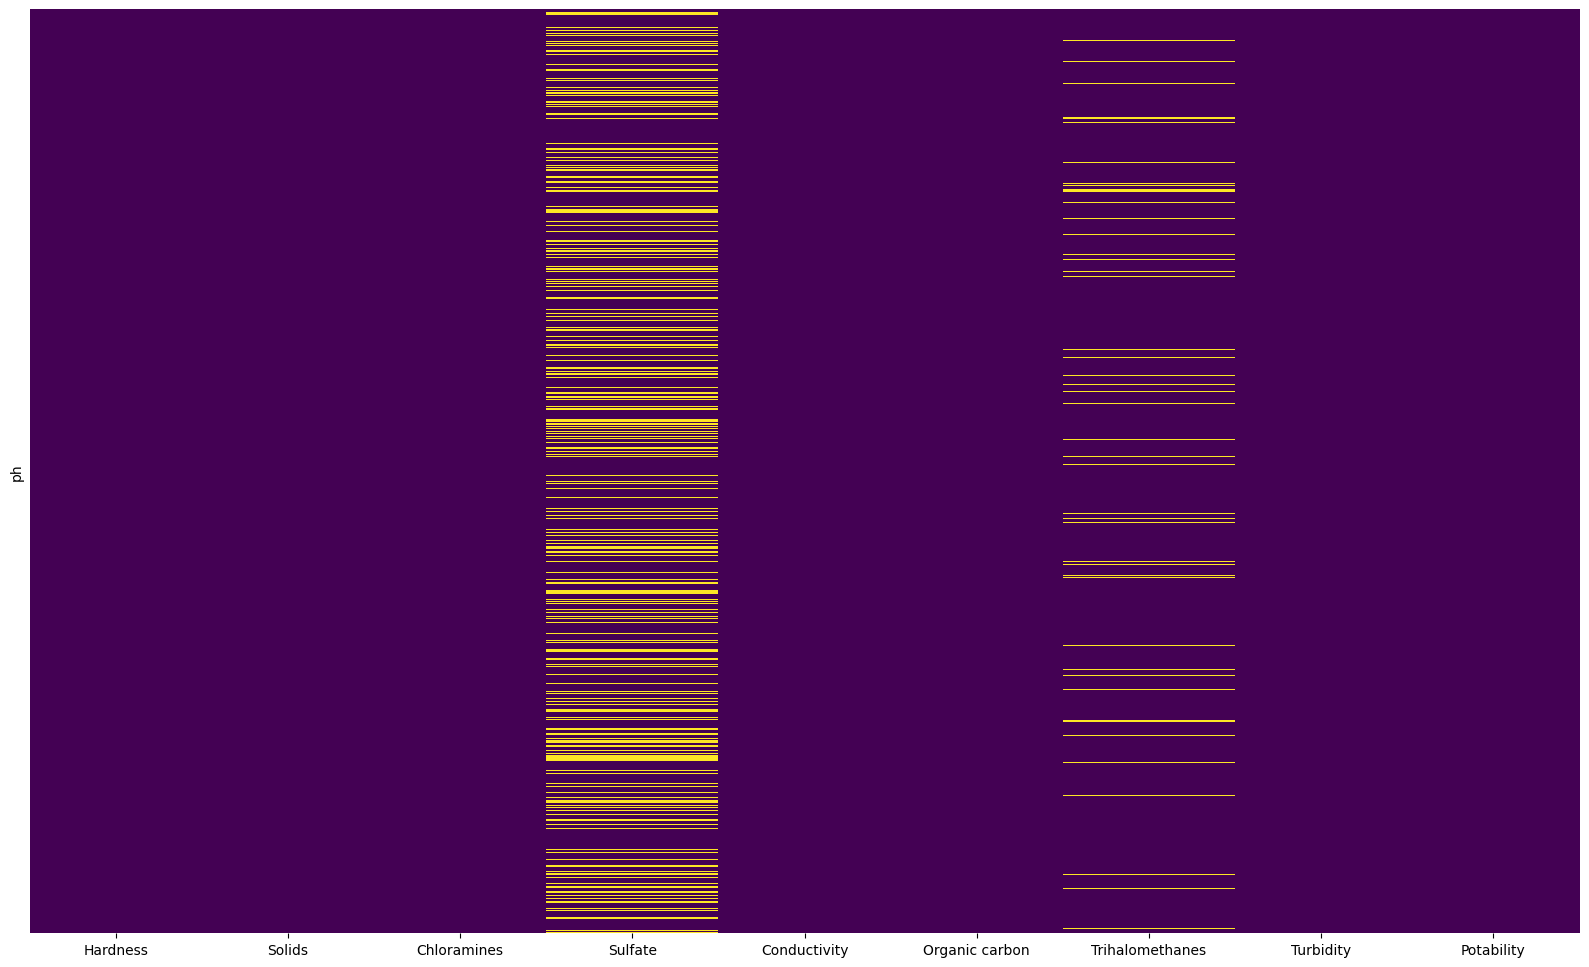

In [26]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

In [27]:
data.fillna("Python").head(10) # С помощью метода .fillna() заменяем все пропуски словом Python

Hardness        Solids  Chloramines     Sulfate  Conductivity  \
ph                                                                           
NaN        204.890455  20791.318981     7.300212  368.516441    564.308654   
3.716080   129.422921  18630.057858     6.635246      Python    592.885359   
8.099124   224.236259  19909.541732     9.275884      Python    418.606213   
8.316766   214.373394  22018.417441     8.059332  356.886136    363.266516   
9.092223   181.101509  17978.986339     6.546600  310.135738    398.410813   
5.584087   188.313324  28748.687739     7.544869  326.678363    280.467916   
10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
8.635849   203.361523  13672.091764     4.563009  303.309771    474.607645   
NaN        118.988579  14285.583854     7.804174  268.646941    389.375566   
11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

           Organic carbon Trihalomethanes  Turbidity  Potability  
ph                                                                
NaN             10.379783        86.99097   2.963135           0  
3.716080        15.180013       56.329076   4.500656           0  
8.099124        16.868637       66.420093   3.055934           0  
8.316766        18.436524      100.341674   4.628771           0  
9.092223        11.558279       31.997993   4.075075           0  
5.584087         8.399735       54.917862   2.559708           0  
10.223862       13.789695       84.603556   2.672989           0  
8.635849        12.363817       62.798309   4.401425           0  
NaN             12.706049       53.928846   3.595017           0  
11.180284       17.927806       71.976601   4.370562           0

In [28]:
### Описательные статистики

Теперь посмотрим, а что содержательно у нас есть на руках. 

Глазами просматривать не будем, а попросим посчитать основные описательные статистики. Причем сразу все.

- describe() - метод, который возвращает табличку с описательными статистиками. В таком виде считает все для числовых столбцов

SyntaxError: invalid syntax (192570114.py, line 3)

In [ ]:
data.describe() # Отобразим описательные статистики нашего датафрейма (только числовые данные)

Немножко магии, и для нечисловых данные тоже будут свои описательные статистики. 

In [ ]:
data.describe(include=['O']) # # Отобразим описательные статистики нашего датафрейма ('O' - в том числе и строковые)

In [ ]:
### Срезы данных

Допустим, нам не нужен датасет, а только определенные столбцы или строки или столбцы и строки. 


Как делать?
Помним, что:
- у столбцов есть названия
- у строк есть названия
- если нет названий, то они пронумерованы с нуля

Основываясь на этой идее, мы начнем отбирать данные.

In [ ]:
data.head(1) # Отобразим первую строчку датафрейма

#### Отбираем по столбцам. Версия 1. 

In [ ]:
array = data['price'] # Отобразим столбец price
array

In [ ]:
data.price

In [ ]:
data.price.head() # Отобразим столбец price (альтернативные вариант)

In [ ]:
new_df = data[['price','country']].head() # Отобразим столбцы 'price' и 'country'
new_df

#### Отбираем по  строкам. Версия 1. 

In [ ]:
data[10:20] # Отобразим с 10й по 20ю строки датафрейма

In [ ]:
data[10:20:3] # Отобразим с 10й по 20ю строки датафрейма с шагом 2

In [ ]:
data[::5].head(10) # Отобразим каждую 5ю строку датафрейма

#### Отбор по столбцам. Версия 2. Все еще по названиям 

In [ ]:
data.head(10)

In [ ]:
data.loc[4:7, ['price', 'points']] # Отобразим два столбца 'price' и 'points', и в них строки с индексами с 4 по 7

#### Отбор по  строкам. Версия 2. Все еще по названиям 

In [ ]:
data.loc[:5,:] # Отобразим строки с индексом от 0 до 5  (то же, что и data.loc[:5])

#### Отбор по строчкам и столбцам. Версия 3. По номеру строк и столбцов

In [ ]:
data.iloc[::5, [1,3]].head() # Отобразим каждую 5 строку и 1 и 3 столбец

#### Отбор с условиями

Так, а если мне нужны вина дороже $15 долларов? Как быть?

In [ ]:
#задаем маску
mask = data['price'] > 15

In [ ]:
mask.head() # Отобразим маску

In [ ]:
#и отбираем данные
temp = data[mask] # Выбираем данные из датафрейма в соответствии с маской и записываем их в новый даатафрейм temp
temp # Отображаем temp

In [ ]:
data[data.price>300].head()# Альтернативный вариант

In [ ]:
data[(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))].head(15) # Составное условие

In [ ]:
### Мультииндексация

In [ ]:
data.head() # Отобразим наш датафрем

In [ ]:
data_ = data.groupby(['country', 'price']).count() # Сграппируем данные сначала по странам, а затем по price
data_.head(100) # Отобразим первые 50 строк нового датафрейма

In [ ]:
data_.loc['US'] # Отобразим все данные для 'US'

In [ ]:
data_.loc['US', 100] # Отобразим данные для 'US', у кого 100 points

In [ ]:
#### Как изменять значения в табличке

In [ ]:
data_backup = data.copy() # Создаем копию нашего датафрейма и записываем в переменную data_backup
data.head()

In [ ]:
data.iloc[0,1] = 'kotiki' # Вставляем новое значение в 0 строку и 1 стоблец
data.iloc[2,2] = '129' # Вставляем новое значение в 2 строку и 2 стоблец
data.iloc[3:5,2:5] = 'new' # Вставляем новое значение с 3 по 5 строку и со 2го по 5ый стоблец
data.head(8)

In [ ]:
data = data_backup.copy() # Восстанавливаем данные из копии

In [ ]:
data.head()

In [ ]:
data.loc[data.country == 'US', 'region_2'] = 'Syberia'
data.loc[data.price > 100, 'points'] = 200
data.loc[data.price > 100, 'price'] = 1000
data.head()

In [ ]:
## Перевод в Numpy


In [ ]:
np_data = data.values # Получаем данные из датафрейма и записываем их в переменную np_data
print(np_data.shape) # Выводим размерность np_data
np_data.dtype

In [ ]:
print(np_data[0]) # Выводим 0ой элемент из массива

In [ ]:
# Выведем первые 10 элементов из np_data
for i in range(10):
    print(np_data[i])

# **Глоссарий**


pd.DataFrame(данные, columns = [колонки, если есть], index = [индексы ,если есть]) - создать датафрейм

pd.read_csv(полный адрес расположения файла) - открыть .csv файл

------------

.head() - посмотреть верхушку датафрейма (первые n строк)

.tail() - посмотреть конец датафрейма (последние n строк)

.columns - список колонок датафрейма

.values - вывести массив всех значений датафрейма

.index - список индексов датафрейма

.tolist() - перевести в список

.count() - посчитать количество определенных величин во фрейме

.describe() - посмотреть основные статистические характеристики фрейма

.shape - форма фрейма (строки, колонки)

.size - размер фрейма строки*колонки

.info() - информация о данных каждой колонки

.dtypes - тип данных каждой колонки

.isnull() - где недостает значений

.isna()- есть ли значения None

.dropna() - выкинуть строки/колонки с None

.fillna() - заполнить заданным значеним ячейки, где есть None

.loc[] - вывести значения по названиям колонок

.iloc[] - вывести значения по индексам колонок

.drop() - выкинуть определенные значения

--------------

pd.to_datetime(колонка, которую переводим в формат временного ряда)

.groupby() - сгруппировать по конкретному признаку

.copy() - создать копию

.sort_values() - сортировка значений

pd.concat([df1,df2]) - конкатенация фреймов

.merge(второй_датафрейм, on = 'общая колонка, по которой склеиваем', how = 'с какой стороны') - конкатенация фреймов через общий признак

-------------


.corr() - вычислить корреляцию

.median() - вычислить медиану

.cumsum() - вычислить куммулятивную сумму

.cumprod() - вычислить коммулятивное произведение

.cummax() - вычислить коммулятивный максимум

-------------

.quantile([]) - вычислить квантили

.nunique() - уникальные значения для n-колонок/строк

.unique() - уникальные значения определенной колонки/строк

------------

.apply(функция) - применить функцию для колонки/строки

.agg(набор_функций) - применить ряд функций для колонки/строки
